#  Simple Linear Regression

In [1]:
#import relevant libraries that will be called upon later
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
import statsmodels.api as sm

#the code below replaces the our graphs with those from seaborn
sns.set()

In [2]:
#load the data
raw_data = pd.read_csv('Salary_Data.csv')

#we create a copy of the raw_data before making any alterations to the original dataset
data = raw_data.copy()

#view the first five data 
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Preprocessing 
The dataset given is clean, but let us perform some preprocessing to confirm this

In [3]:
#check if there are missing entries in the dataset, check for count and whether the value tallies
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#check if there are missing values on any of the columns and their data type
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

The data is relatively simple, containing two columns with two variables. YearsExperience is taken as the independent variable as salary will increase with the increment of YearsExperience. Let us evaluate the dataset using statsmodels.



# Regression


In [5]:
#set the independent and dependent variables
x1 = data['YearsExperience']
y = data['Salary']

#add a constant to x 
x = sm.add_constant(x1)

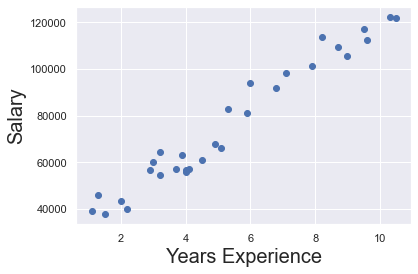

In [9]:
#check the scatter plot of the dataset 
mpl.scatter(x1,y)
mpl.xlabel('Years Experience',fontsize='20')
mpl.ylabel('Salary',fontsize='20')

mpl.show()

In [11]:
#now we shall perfom the linear regression
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        11:58:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary above shows that years of experience is a good predictor for salary, given that the value of R-squared is close to 1 and the p-value is statistically significant (p<0.05)

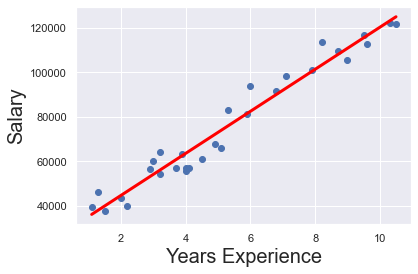

In [15]:
#let us plot the regression line on the scatter plot we made by first plotting the scatter
mpl.scatter(x1,y)
mpl.xlabel('Years Experience',fontsize='20')
mpl.ylabel('Salary',fontsize='20')

#define the linear regression model
yhat = 9449.9623*x1 + 2.579e+04

#plot the linear regression model
fig=mpl.plot(x1,yhat, lw='3', c='red',label='regression line')

mpl.show()

We can use sklearn for the same purposes, but this exercise is a fairly simple one, hence we choose a simpler method
